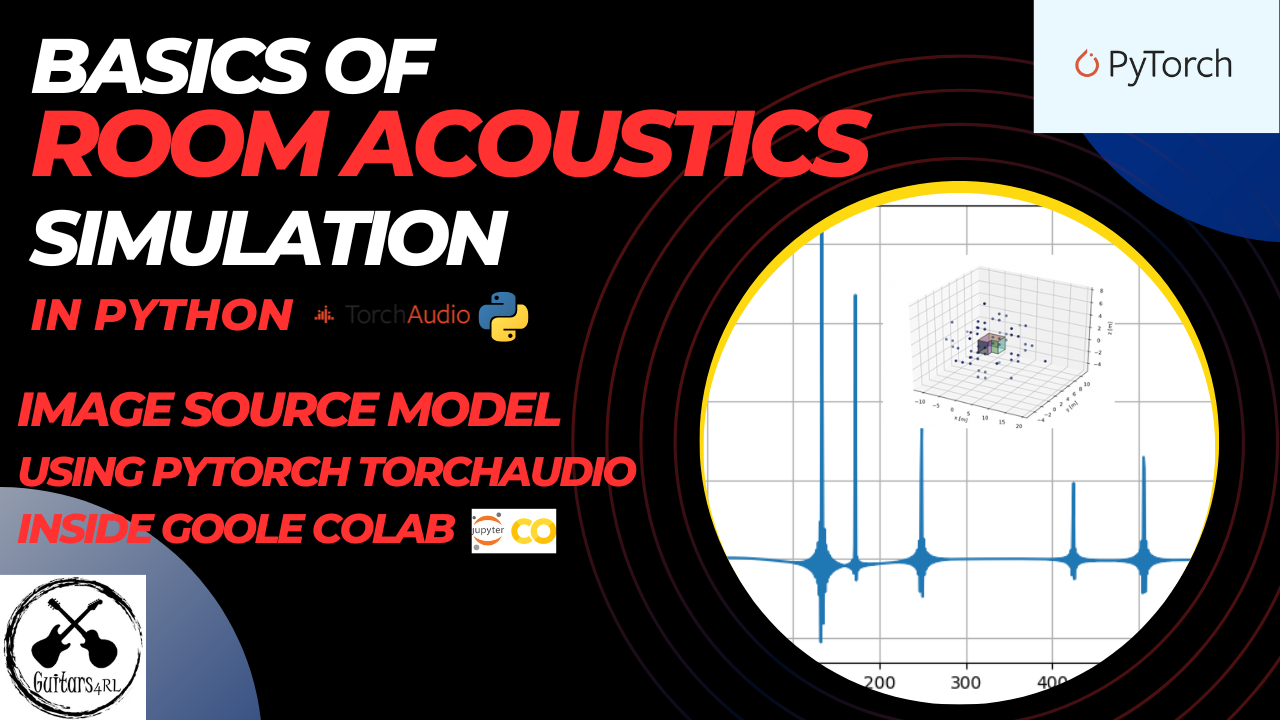

In [1]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/F_hek6Wqtg8?si=bYVJqk85mWFdqVWM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


# Checking Colab environment versions

In [1]:
# Check versions
import torch
import torchaudio
print("PyTorch:", torch.__version__)
print("Torchaudio:", torchaudio.__version__)
!lsb_release -a
!nvcc --version

PyTorch: 2.2.1+cu121
Torchaudio: 2.2.1+cu121
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


Removing old versions and installing required versions:

In [2]:
# Remove current Cuda Compiler version
!apt-get purge nvidia*
!apt-get autoremove
!apt-get autoclean
!rm -rf /usr/local/cuda*

# Install required Cuda compiler version
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.0-1_all.deb
!dpkg -i cuda-keyring_1.0-1_all.deb
!apt-get update
!apt-get -y install cuda-toolkit-12-1


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'nvidia-driver-550-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-docker2' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-doc' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-server-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-headless-390' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-gcc' for glob 'nvidia*'
Note, selecting 'nvidia-headless-418' for glob 'nvidia*'
Note, selecting 'nvidia-headless-430' for glob 'nvidia*'
Note, selecting 'nvidia-headless-435' for glob 'nvidia*'
Note, selecting 'nvidia-headless-440' for glob 'nvidia*'
Note, selecting 'nvidia-headless-450' for glob 'nvidia*'
Note, selecting 'nvidia-headless-455' for glob 'nvidia*'
Note, selecting 'nvidia-headless-460' for glob 'nvidia*'
Note, se

Installing building tools:

In [3]:
# Install building tools
!pip install cmake ninja


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.2 MB/s eta 0:00:00


Installing Torchaudio Nightly

In [4]:
# Install torchaudio 2.2.1 nightly
!git clone https://github.com/pytorch/audio
%cd audio
!git checkout nightly
#!python setup.py develop
!pip install -v -e . --no-use-pep517

Cloning into 'audio'...
remote: Enumerating objects: 33616, done.
remote: Counting objects: 100% (650/650), done.
remote: Compressing objects: 100% (548/548), done.
remote: Total 33616 (delta 463), reused 235 (delta 83), pack-reused 32966
Receiving objects: 100% (33616/33616), 410.21 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (23337/23337), done.
/content/audio
Branch 'nightly' set up to track remote branch 'nightly' from 'origin'.
Switched to a new branch 'nightly'
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/audio
  Running command python setup.py egg_info
  -- Git branch: nightly
  -- Git SHA: eaac5d20013b0ef244ef8b11023809fdc82b1180
  -- Git tag: None
  -- PyTorch dependency: torch
  -- Building version 2.2.0a0+eaac5d2
  running egg_info
  creating /tmp/pip-pip-egg-info-m0us6rpq/torchaudio.egg-info
  writing /tmp/pip-pip-egg-info-m0us6rpq/torchaudio.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-inf

At this point the runtime needs to be restarted.

Check if the required versions are installed and import them:



In [1]:
# At this point we must restart the runtime and re-import the libraries
import torch
import torchaudio
print("PyTorch:", torch.__version__)
print("Torchaudio:", torchaudio.__version__)
!lsb_release -a
!nvcc --version


PyTorch: 2.2.1+cu121
Torchaudio: 2.2.0a0+eaac5d2
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0


In [2]:
# Install pyroomacoustics
!pip install pyroomacoustics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.7.3-cp310-cp310-linux_x86_64.whl size=11909854 sha256=9bf22be4a61ac9ad2cc99f78b58fe395a0009ec67584beb515cb4a13ad8167bd
  Stored in directory: /root/.cache/pip/wheels/6b/f3/67/0d0c4c06234c59c14e5ccf72774bd5c5f1b43c3083043c7fb7
Successfully built pyroomacoustics


Configuring the parameters for the ISM:

In [3]:
# Import pyroomacoustics
import pyroomacoustics as pra


In [11]:
# ISM configuration
room_dim = torch.tensor([10.0, 10.0, 3.0])
source = torch.tensor([4.0,4.0, 2.0])
mic = torch.tensor([[6.0,4.0,2.0]])
max_order = torch.tensor(1)
m = pra.Material(energy_absorption="hard_surface")
absorption = m.absorption_coeffs
materials = torch.tensor([absorption,absorption,absorption,absorption,absorption,absorption]).T
print(materials.shape)


torch.Size([7, 6])


Computing RIR with torch audio, and plotting results:

In [5]:
# Import SIMULATE_RIR_ISM
from torchaudio.prototype.functional import simulate_rir_ism

In [6]:
rir_ism_torch = simulate_rir_ism(room_dim, source, mic, max_order,materials)

In [7]:
import matplotlib.pyplot as plt

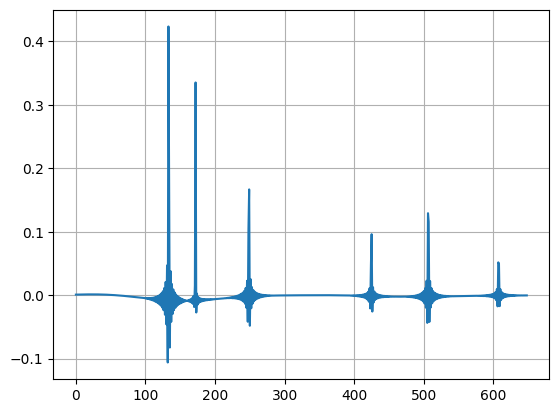

In [8]:
plt.figure()
plt.plot(rir_ism_torch.T)
plt.grid()

Comparing with PyRoomAcoustics:

In [9]:
import numpy as np
m = pra.make_materials(
    ceiling="hard_surface",
    floor="hard_surface",
    east="hard_surface",
    west="hard_surface",
    north="hard_surface",
    south="hard_surface",
)
room = pra.ShoeBox(room_dim, fs=16000, max_order=max_order, materials=m)
room.add_source(source.numpy())
room.add_microphone(mic[0].numpy().astype(np.double))
room.compute_rir()

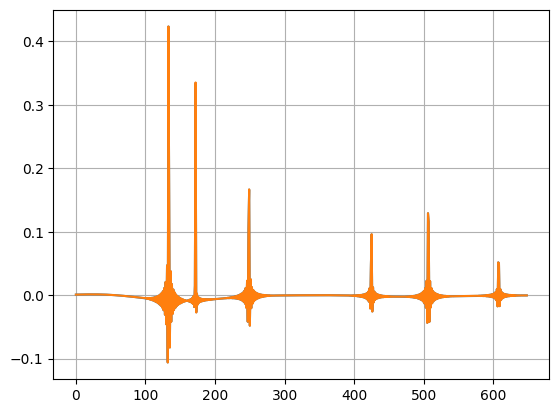

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(room.rir[0][0])
plt.plot(rir_ism_torch.T)
plt.grid()

In [ ]:
#https://pytorch.org/audio/main/generated/torchaudio.prototype.functional.simulate_rir_ism.html#torchaudio.prototype.functional.simulate_rir_ism#
#https://pyroomacoustics.readthedocs.io/en/pypi-release/pyroomacoustics.room.html#pyroomacoustics.room.ShoeBox